In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [6]:
df=pd.read_csv('Advertising.csv',index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [10]:
feature_cols = ['TV','radio','newspaper']
X = df[feature_cols]
Y = df.sales
lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [17]:
Y_pred_train = lm.predict(X_train)
Y_pred_test = lm.predict(X_test)

In [43]:
train_pred_df = pd.DataFrame({'actual' : Y_train, 'predicted' : Y_pred_train, 'residual' : Y_train -Y_pred_train}) 

In [21]:
train_pred_df.head()

,actual,predicted,residual
170,15.0,17.941556,-2.941556
98,15.5,15.337078,0.162922
32,11.9,11.346093,0.553907
13,9.2,10.577121,-1.377121
36,12.8,17.006826,-4.206826


In [44]:
test_pred_df = pd.DataFrame({'actual' : Y_test, 'predicted' : Y_pred_test, 'residual' : Y_test - Y_pred_test}) 
test_pred_df.head()

,actual,predicted,residual
96,16.9,16.314921,0.585079
16,22.4,20.819300,1.580700
31,21.4,21.633934,-0.233934
159,7.3,10.384199,-3.084199
129,24.7,22.255492,2.444508


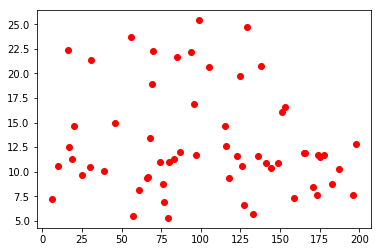

In [24]:
plt.scatter(test_pred_df.index, test_pred_df.actual, color='red')
plt.show()

In [26]:
from sklearn import metrics

In [29]:
rmse_train = np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train))
rmse_train

1.601247667558773

In [30]:
rmse_test = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test))
rmse_test

1.815975816200249

Nilai RMSE train harus lebih kecil daripada RMSE test, semakin kecil semakin bagus. <br/>
RMSE merupakan nilai rata-rata dari jumlah kuadrat kesalahan, juga dapat menyatakan ukuran besarnya kesalahan yang dihasilkan oleh suatu model prakiraan. Nilai RMSE rendah menunjukkan bahwa variasi nilai yang dihasilkan oleh suatu model prakiraan mendekati variasi nilai obeservasinya.

In [31]:
metrics.r2_score(Y_train, Y_pred_train)

0.9022905037730669

In [32]:
metrics.r2_score(Y_test, Y_pred_test)

0.8792230188851212

Nilai R square yg tinggi, maka model semakin bagus

## Residual Plot

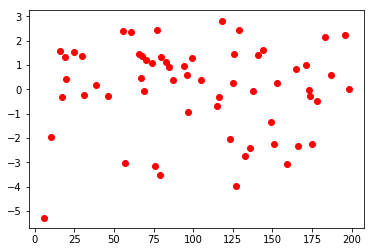

In [34]:
plt.scatter(test_pred_df.index, test_pred_df.residual, color='red')
plt.show()

Scatter plot untuk residual (y_aktual - y_predicted) =  Residual harus random dan tidak ada patter, selain itu harus menyebar di garis 0

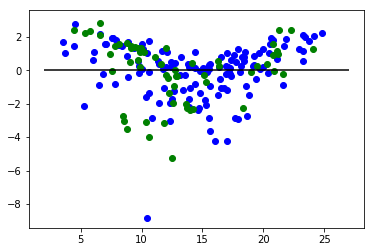

In [53]:
plt.scatter(train_pred_df.predicted, train_pred_df.residual, color='blue')
plt.scatter(test_pred_df.predicted, test_pred_df.residual, color='green')
plt.hlines(y=0, xmin=2, xmax=27)
plt.show()

In [55]:
import seaborn as sns

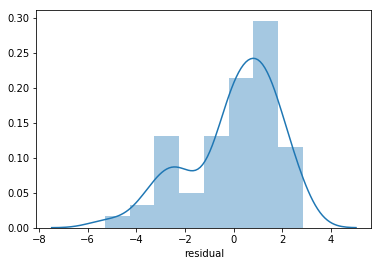

In [57]:
sns.distplot(test_pred_df.residual)

## Asumsi Multicorr

In [59]:
import seaborn as sns

In [62]:
corr_df = X_train.corr(method='pearson')

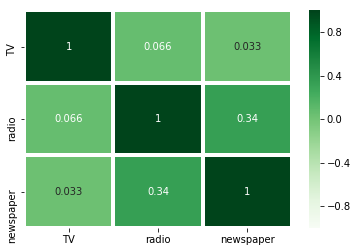

In [71]:
sns.heatmap(corr_df, cmap = 'Greens', vmax=1.0, vmin = -1.0, linewidth = 3, annot=True)
plt.show()

In [70]:
import scipy as sc

Jika melihat matriks korelasi, nilai coef nya lebih dari 0,75 maka kemungkinan besar ada multicolinearity

In [73]:
coef = sc.corrcoef(X_train, rowvar = 0)
coef

array([[1.        , 0.06593822, 0.03312809],
       [0.06593822, 1.        , 0.34159872],
       [0.03312809, 0.34159872, 1.        ]])

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

Jika dilihat dari VIF, apabila nilainya lebih dari 10 maka kemungkinan besar ada multicolinearity

In [82]:
[variance_inflation_factor(X_train.values,j) for j in range(X_train.shape[1])]

[2.6976786689636088, 3.473818052574502, 3.162643016014367]

## Test Normality of Residual

In [88]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula = 'sales~ TV + radio + newspaper', data=df).fit()

**check normality of residual** <br/>
Shapiro_wilk test <br/>
H0 : residual normal <br/>
H1 : residual tidak normal

In [91]:
from scipy import stats

cara baca = (t-test, p-value) --> bila p-value < 0.05 maka H0 ditolak, sehingga H1 diterima dan residual tidak normal

In [92]:
stats.shapiro(lm2.resid)

(0.9176644086837769, 3.938041004403203e-09)

QQ-plot normal dist reject jika points tidak segaris lurus

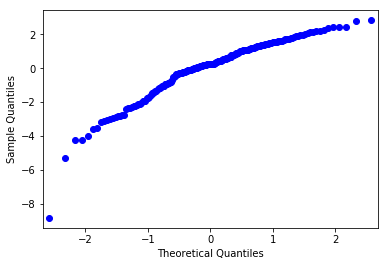

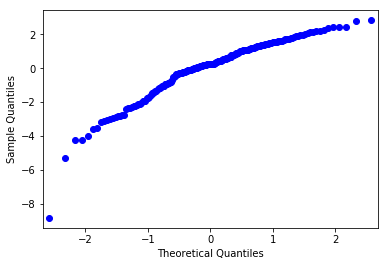

In [95]:
sm.qqplot(lm2.resid)

Kalau bentuk garis tidak lurus / sedikit lengkung, maka ada kemungkinan tidak normal

## Check Autocorrelation

** Checking autocorrelation ** <br/>
Ljung-box test <br/>
H0 : Tidak ada autokorelasi<br/>
H1 : Ada Autocor

In [96]:
from statsmodels.stats import diagnostic

cara baca = (t-test, p-value) --> p-value > 0.05 maka H0 dterima (tidak ada autocor)

In [97]:
diagnostic.acorr_ljungbox(lm2.resid, lags = 1)

(array([0.44613369]), array([0.50417674]))

## Check Heteroscedacity <br/>
Homo = variansnya konstan, kalo hetero menyebar tidak konstan

Goldfelt Quandt Test: <br/>
H0 : Error term are Homo<br/>
H1 : Error term are Hetero

Cara lain pake varian dan covarian matriks

In [99]:
import statsmodels.stats.api as sm
from statsmodels.compat import lzip

cara baca = (t-test, p-value) --> p-value > 0.05 maka H0 tidak ditolak, dan residual homoscedacity

In [102]:
test = sm.het_goldfeldquandt(lm2.resid, lm2.model.exog)
test

(1.3516832040090752, 0.07082060666290767, 'increasing')

## Outlier

1. High Leverage = Kalo ada data yang extreme, jauh dari tren (extreme value berdasarkan nilai X). Apabila ada high leverage dan multiple predictors : 
    - bisa jadi ada potensi antar x yang multicol padahal harusnya independen
    - bisa jadi antar x ada nilai yang berbeda (x-nya tinggi dann satuya rendah)
2. Influential = langsung berpengaruh ke hasil model prediksi, bisa ke slope bisa ke intercept
    - Student Test --> seberapa besar residual dalam satu satuan std dev, bila > 3 maka data outlier berpengaruh

In [121]:
influence = lm2.get_influence()
resid_student = influence.resid_studentized_external

In [122]:
resid = pd.concat([X_train, pd.Series(resid_student, name = 'Studentized Residuals')], axis = 1)
resid

,TV,radio,newspaper,Studentized Residuals
0,NaN,NaN,NaN,0.946804
1,230.1,37.8,69.2,-1.162079
2,44.5,39.3,45.1,-1.831389
3,17.2,45.9,69.3,0.538774
4,151.5,41.3,58.5,-0.172887
5,180.8,10.8,58.4,-3.288033
6,NaN,NaN,NaN,0.041870
7,57.5,32.8,23.5,0.640993
8,120.2,19.6,11.6,0.645442
9,8.6,2.1,1.0,-1.168564


In [123]:
resid.loc[np.absolute(resid["Studentized Residuals"]) > 3, :]

,TV,radio,newspaper,Studentized Residuals
5,180.8,10.8,58.4,-3.288033
130,59.6,12.0,43.1,-5.757983


In [124]:
# index influential
ind = resid.loc[np.absolute(resid["Studentized Residuals"]) > 3, :].index

In [130]:
X_train.drop(ind, inplace=True)

ValueError: labels [  5 130] not contained in axis

In [129]:
Y_train.drop(ind, inplace=True)

170    15.0
98     15.5
32     11.9
13      9.2
36     12.8
120     6.6
43     20.7
190     6.7
91     11.2
137     9.5
52     10.7
128     8.8
163    14.9
42     17.1
119    15.9
114    15.9
27     15.0
140    20.7
101    11.7
112    21.8
3       9.3
78     14.2
47     10.6
188    17.3
192     9.9
86     15.2
162    13.3
37     25.4
191    10.8
62     24.2
       ... 
59     23.8
49     14.8
89     12.9
22     12.5
58     13.2
161    14.4
193     5.9
38     14.7
158    10.1
194    19.6
2      10.4
53     22.6
150    10.1
131     1.6
152    11.6
104    14.7
100    17.2
117    12.2
88     16.0
75     17.0
122     7.0
200    13.4
21     18.0
189    15.9
72     12.4
107     7.2
15     19.0
93     19.4
180    12.6
103    14.8
Name: sales, Length: 138, dtype: float64

In [139]:
def plot_learning_curve(model, X, Y):
    X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], Y_train[:m])
        Y_train_predict = model.predict(X_train[:m])
        Y_val_predict = model.predict(X_val[:m])
        train_errors.append(mean_squared_error(Y_train_predict, Y_train[:m]))
        val_errors.append(mean_squared_error(Y_val_predict, Y_val[:m]))
    plt.plot(np.sqrt(train_errors), 'r-+', label = 'train')
    plt.plot(np.sqrt(val_errors), 'b-', label = 'validation')
    plt.show()

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lm = LinearRegression()

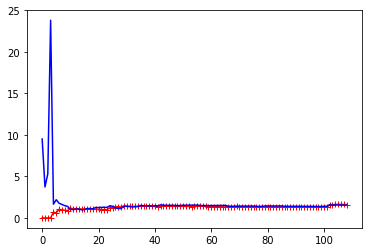

In [142]:
plot_learning_curve(lm, X_train, Y_train)